# Trabajo practico integrador: Parte 1
## [Crimenes ocurridos en la ciudad de Chicago (2024)](https://data.cityofchicago.org/Public-Safety/Crimes-in-Chicago/ijzp-q8t2)

### Grupo: 9
### Alumno: Maxim Dorogov

## Objetivo
El objetivo de este trabajo es realizar un analisis exploratorio de datos (EDA) sobre los crimenes ocurridos en la ciudad de Chicago en el año 2024. Se busca identificar las caracteristicas mas relevantes, patrones, tendencias y posibles correlaciones entre diferentes variables del dataset.

## Descripcion y analisis preliminar 

### <u>Columnas del dataset</u>

Esta informacion fue obtenida de la documentacion del dataset en [data.cityofchicago.org](https://data.cityofchicago.org/Public-Safety/Crimes-in-Chicago/ijzp-q8t2).

1. __ID__
    Unique identifier for the record.


1. __Case Number__
    The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.


1. __Date__
    Date when the incident occurred. this is sometimes a best estimate.


1. __Block__
    The partially redacted address where the incident occurred, placing it on the same block as the actual address.


1. __IUCR__
    The Illinois Uniform Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.


1. __Primary Type__
    The primary description of the IUCR code.


1. __Description__
    The secondary description of the IUCR code, a subcategory of the primary description.


1. __Location Description__
    Description of the location where the incident occurred.


1. __Arrest__
    Indicates whether an arrest was made.


1. __Domestic__
    Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.


1. __Beat__
    Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.


1. __District__
    Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.


1. __Ward__
    The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.


1. __Community Area__
    Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.


1. __FBI Code:__ 
    Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).See the Chicago Police Department listing of these classifications at https://gis.chicagopolice.org/pages/crime_details.

1. __X Coordinate__
    The X coordinate of the location where the incident occurred, in the State Plane Coordinate System (SPCS) of Illinois East.

1. __Y Coordinate__
    The Y coordinate of the location where the incident occurred, in the State Plane Coordinate System (SPCS) of Illinois East.

1. __Year__
    The year when the incident occurred.

1. __Updated On__
    The date and time when the record was last updated.

1. __Latitude__
    Latitude of the location where the incident occurred.

1. __Longitude__
    Longitude of the location where the incident occurred.

1. __Location__
    The location of the incident in the form of a point geometry, which includes latitude and longitude coordinates.

En un análisis preliminar, basado en la descripcion provista, se descartan las siguientes columnas:
- __ID & Case Number__: Códigos únicos que identifican cada reporte y caso en el sistema (No estan catalogan el tipo de crimen ni estan relacionados con otras variables, solo son un identificador unico por caso).
- __Block__: Dirección censurada del crimen. (Dato incompleto)
- __Location__: Tupla de coordenadas de latitud y longitud.
- __Updated On__: Fecha de actualización del reporte. (No relacionada a la fecha del crimen) 
- __Year__: Año del crimen. (2024 para todos los casos)

Algo a tener en cuenta es que hay múltiples columnas que aportan información geográfica y es posible que no todas sean necesarias e incluso presenten informacion redundante para un modelo de machine learning. 

## Analisis Exploratorio de datos (EDA)

In [8]:
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt

In [26]:
CSV_PATH = 'Crimes_-_2024_20250701.csv'
df = pd.read_csv(CSV_PATH)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13709672,JJ101940,12/31/2024 11:58:00 PM,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,5,43.0,14,1186817.0,1860189.0,2024,05/17/2025 03:40:52 PM,41.771470,-87.590742,POINT (-87.59074212 41.771470188)
1,13707925,JJ100089,12/31/2024 11:56:00 PM,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,...,3,38.0,26,1179661.0,1873623.0,2024,05/17/2025 03:40:52 PM,41.808501,-87.616563,POINT (-87.616562762 41.808500903)
2,13708038,JJ100035,12/31/2024 11:55:00 PM,077XX S CICERO AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,...,18,70.0,04B,1145740.0,1853048.0,2024,05/17/2025 03:40:52 PM,41.752749,-87.741498,POINT (-87.741497836 41.752748627)
3,13709164,JJ101392,12/31/2024 11:53:00 PM,066XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,20,42.0,14,1184362.0,1861188.0,2024,05/17/2025 03:40:52 PM,41.774269,-87.599710,POINT (-87.599709962 41.774269351)
4,13707823,JJ100020,12/31/2024 11:50:00 PM,012XX N MENARD AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,29,25.0,08B,1137458.0,1907694.0,2024,05/17/2025 03:40:52 PM,41.902858,-87.770537,POINT (-87.770536741 41.902858242)


In [27]:
# eliminamos datos que no aportan información relevante
df = df.drop(
    ['ID', 'Case Number', 'Block', 'Updated On', 'Year', 'Location'], axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258378 entries, 0 to 258377
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  258378 non-null  object 
 1   IUCR                  258378 non-null  object 
 2   Primary Type          258378 non-null  object 
 3   Description           258378 non-null  object 
 4   Location Description  257325 non-null  object 
 5   Arrest                258378 non-null  bool   
 6   Domestic              258378 non-null  bool   
 7   Beat                  258378 non-null  int64  
 8   District              258378 non-null  int64  
 9   Ward                  258378 non-null  int64  
 10  Community Area        258376 non-null  float64
 11  FBI Code              258378 non-null  object 
 12  X Coordinate          257370 non-null  float64
 13  Y Coordinate          257370 non-null  float64
 14  Latitude              257370 non-null  float64
 15  

Tenemos un dataset con 22 variables y 258378 observaciones por cada variable. Podemos ver, ademas, que en algunas variables hay valores nulos.


In [29]:
print(df.isnull().sum())

Date                       0
IUCR                       0
Primary Type               0
Description                0
Location Description    1053
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       0
Community Area             2
FBI Code                   0
X Coordinate            1008
Y Coordinate            1008
Latitude                1008
Longitude               1008
dtype: int64


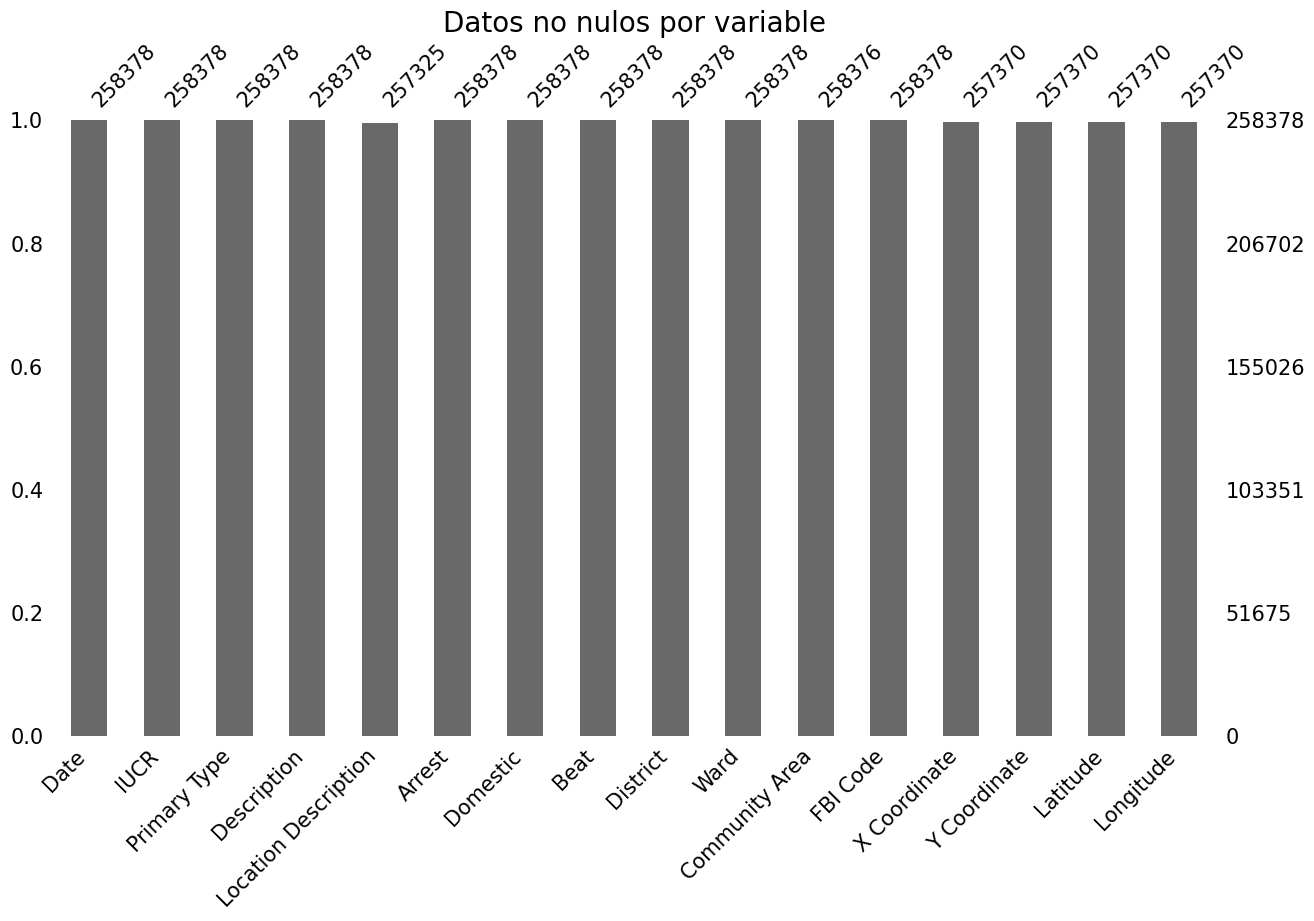

In [30]:
msno.bar(df, fontsize=15, figsize=(15,8))
plt.title("Datos no nulos por variable", fontsize=20)
plt.show()

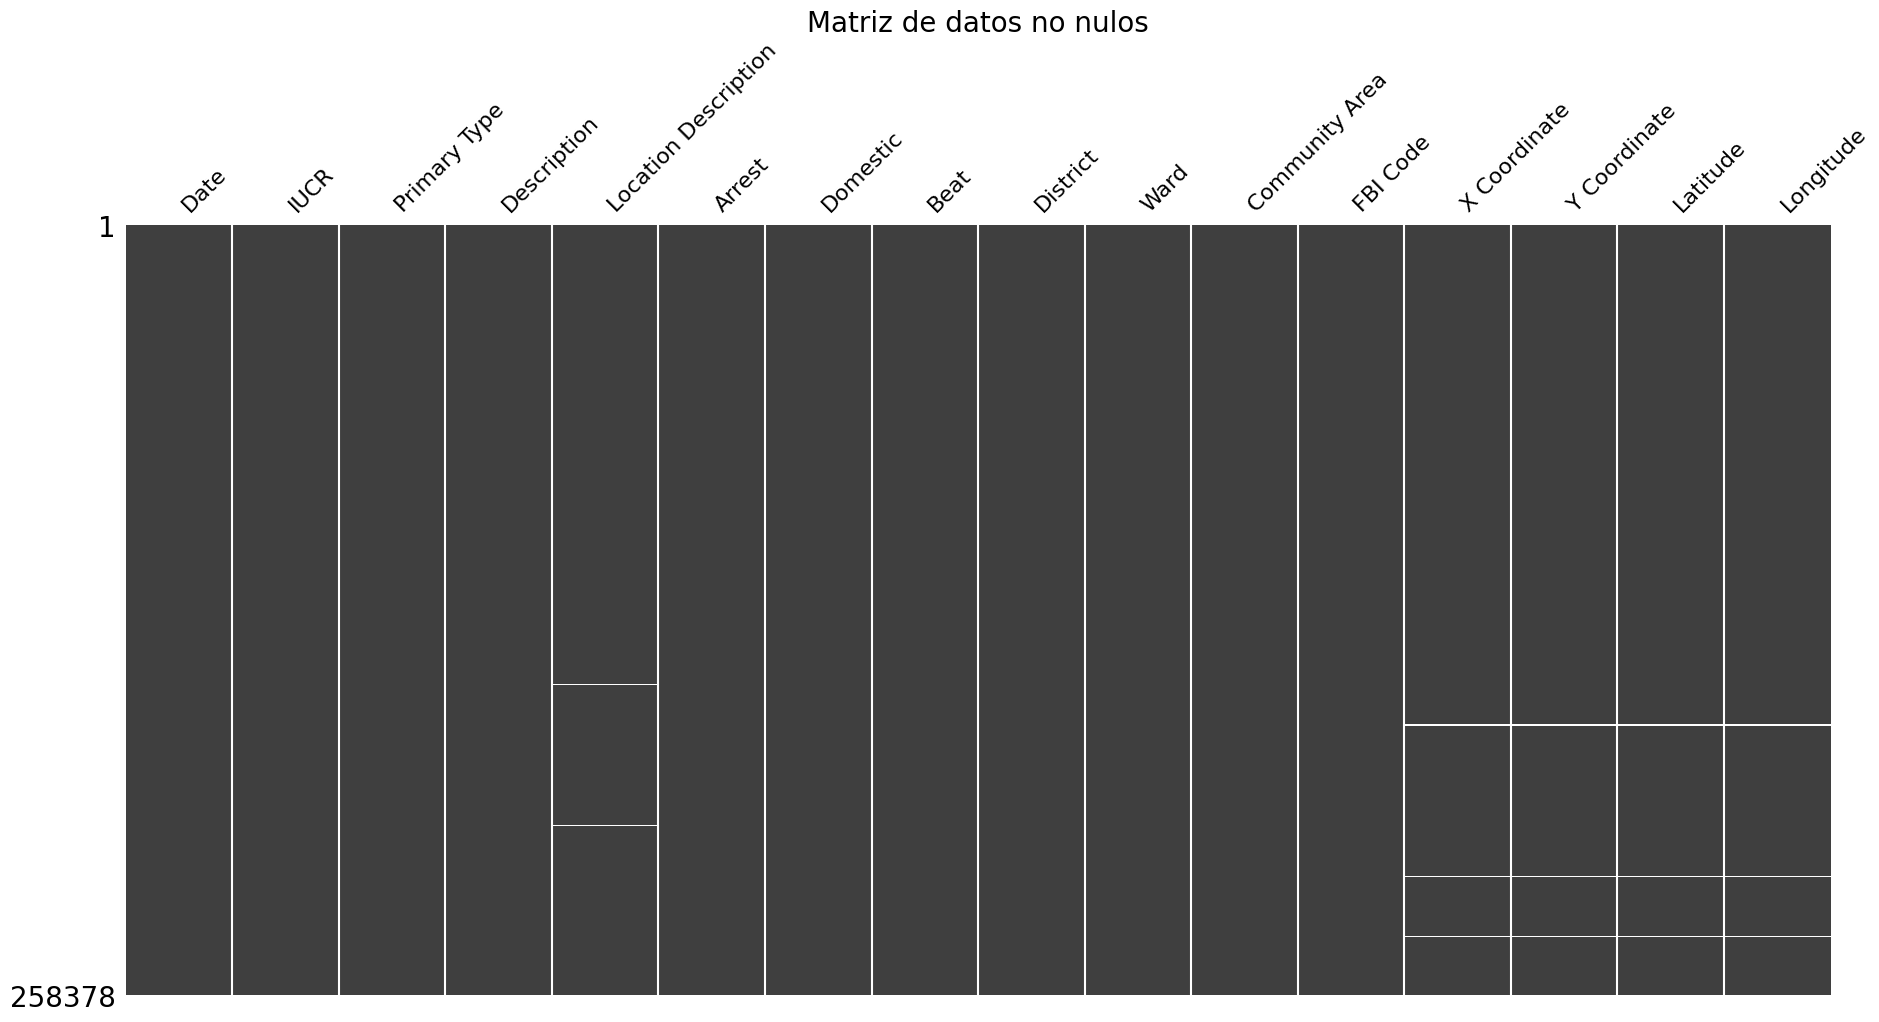

In [31]:
# Plot the missing data matrix
msno.matrix(df, figsize=(22, 10), sparkline=False)
plt.title("Matriz de datos no nulos", fontsize=20)
plt.show()
